# Retail Sales Analysis Report
A exploratory data analysis (EDA) and reporting solution using a sample retail sales dataset from Kaggle.

## Introduction
This report performs a full EDA on retail sales data. It includes cleaning, feature engineering, aggregation, visualization, and report export.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Preparation

In [5]:
np.random.seed(29)
df = pd.read_csv("retail_sales_dataset.csv")

sales_person = np.array(["Michael", "Yomi", "Isaac", "Tomiwa", "Jacob", "Timothy", "John"])
city = np.array(["Abuja", "Lagos", "Ibadan", "Ilorin", "Kano", "Port Harcourt", "Onitsha"])
df["Sales Person"] = np.random.choice(sales_person, 1000)
df["City"] = np.random.choice(city, 1000)

## Data Cleaning and Feature Engineering

In [6]:
df.drop(["Transaction ID", "Customer ID", "Age"], axis=1, inplace=True)
df["Date"] = pd.to_datetime(df["Date"])
df = df.rename(columns={"Gender": "Customer Gender"})
df = df[["Date", "Sales Person", "City", "Product Category", "Customer Gender", "Quantity", "Price per Unit", "Total Amount"]]
df["Month"] = df["Date"].dt.month_name()
df["Weekday"] = df["Date"].dt.day_name()

city_to_region = {
    "Lagos": "South West",
    "Ibadan": "South West",
    "Kano": "North West",
    "Abuja": "North Central",
    "Kwara": "North Central",
    "Onitsha": "South South",
    "Port Harcourt": "South South"  
}
df["Region"] = df["City"].map(city_to_region)

## Overview and Descriptive Statistics

In [7]:
df.head()
df.describe()

,Date,Quantity,Price per Unit,Total Amount
count,1000,1000.000000,1000.000000,1000.000000
mean,2023-07-03 00:25:55.200000256,2.514000,179.890000,456.000000
min,2023-01-01 00:00:00,1.000000,25.000000,25.000000
25%,2023-04-08 00:00:00,1.000000,30.000000,60.000000
50%,2023-06-29 12:00:00,3.000000,50.000000,135.000000
75%,2023-10-04 00:00:00,4.000000,300.000000,900.000000
max,2024-01-01 00:00:00,4.000000,500.000000,2000.000000
std,NaN,1.132734,189.681356,559.997632


## Aggregated Reports

In [11]:
df.set_index("Date", inplace=True)
df.sort_index(inplace=True)

latest_date = df.index.max()
six_months_ago = latest_date - pd.DateOffset(months=5)
last_6months = df.loc[six_months_ago:]

# Monthly revenue and units sold for the last 6 months
last_6months_mrevenue = last_6months["Total Amount"].resample("ME").sum()
last_6months_munits_sold = last_6months["Quantity"].resample("ME").sum()

# Monthly revenue and unit sold
monthly_rev = df["Total Amount"].resample("ME").sum()
monthly_unit_sold = df["Quantity"].resample("ME").sum()

# Total Sales per city
sales_per_city = df.groupby("City")["Total Amount"].sum()
monthly_sales_per_city = df.groupby(["City"])["Total Amount"].resample("ME").sum()

# Average sale per sales person
av_sales_per_salesperson = df.groupby("Sales Person")["Total Amount"].mean()
monthly_sales_per_salesperson = df.groupby("Sales Person")["Total Amount"].resample("ME").sum()

# Top 3 Salespeople by total Revenue
revenue_per_salespeople = df.groupby("Sales Person")["Total Amount"].sum().sort_values(ascending=False)
top_salespeople = revenue_per_salespeople.head(3)

# Revenue breakdown by city in values & percentage
revenue = df.groupby("City")["Total Amount"].sum()
total_revenue = revenue.sum()
percent_revenue = (revenue / total_revenue) * 100
revenue_breakdown = pd.DataFrame({
    "Total Revenue": revenue,
    "Percentage (%)": percent_revenue
})

# Gender-wise average 'Total Amount' 
gw_average = pd.DataFrame(df.groupby("Customer Gender")["Total Amount"].mean())

# Monthly summery
ms_per_city = pd.DataFrame({"Monthly Total Sales per City": monthly_sales_per_city})
ms_per_salesperson = pd.DataFrame({"Monthly Total Sales per City": monthly_sales_per_salesperson})

monthly_summary = pd.DataFrame({
    "Monthly Revenue": monthly_rev,
    "Monthly Unit Revenue": monthly_unit_sold
})

## Pivot Table Reports

In [12]:
df["Month"] = pd.Categorical(df["Month"], categories=["January", "February", "March", "April", "May", "June", 
                                         "July", "August", "September", "October", "November", "December"], ordered=True)

pt_total_by_category_city = df.pivot_table(values="Total Amount", index="City", columns="Product Category", aggfunc="sum")
pt_total_by_category_month = df.pivot_table(values="Quantity", index="Month", columns="Product Category", aggfunc="sum", observed=True)

combined_pt = pd.concat([pt_total_by_category_city, pt_total_by_category_month], keys=["By City", "By Month"])

## Visual Analysis

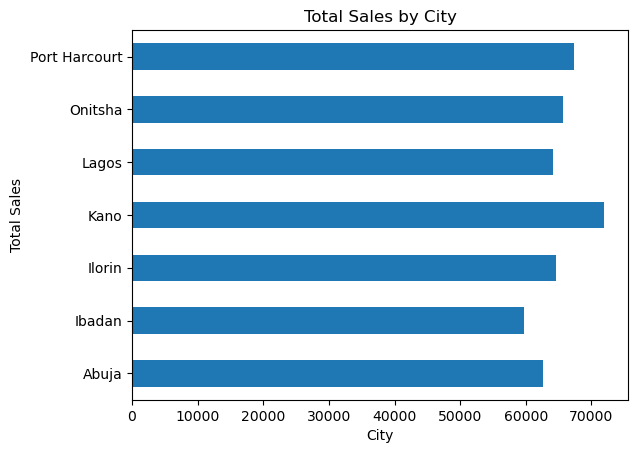

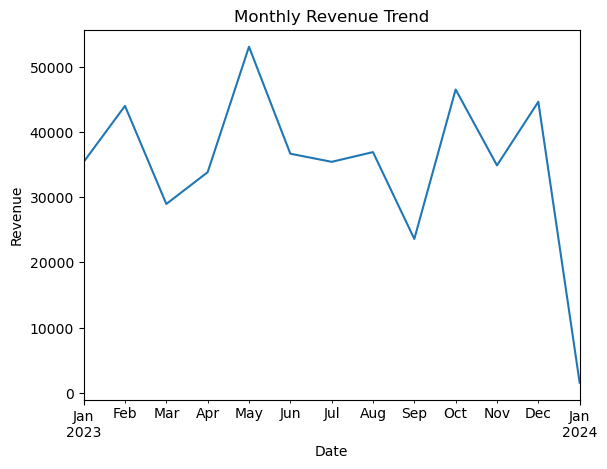

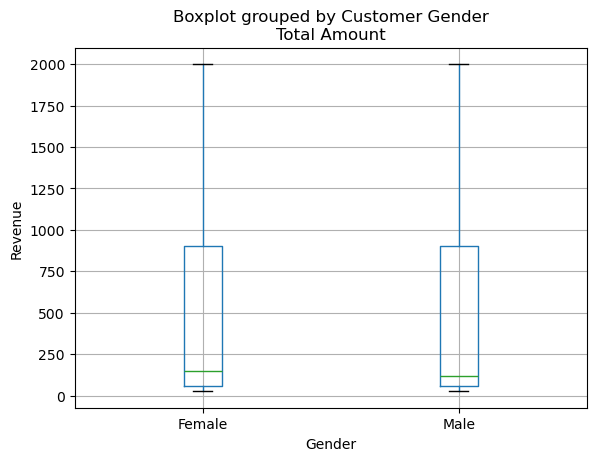

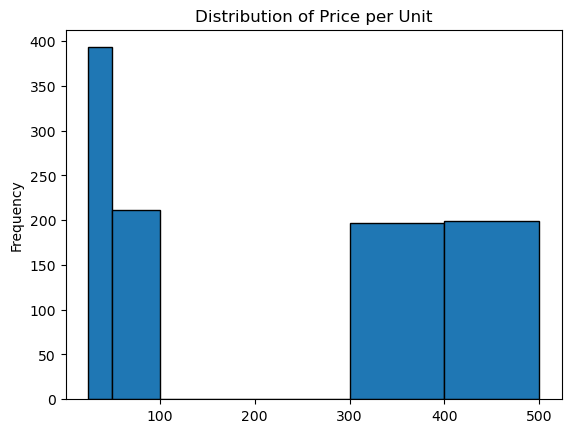

In [13]:
revenue.plot(kind="barh", xlabel="City", ylabel="Total Sales", title="Total Sales by City")
plt.show()

monthly_revenue = df["Total Amount"].resample("ME").sum()
monthly_revenue.plot(kind="line")
plt.xlabel("Date"); plt.ylabel("Revenue"); plt.title("Monthly Revenue Trend")
plt.show()

df.boxplot(column="Total Amount", by="Customer Gender")
plt.xlabel("Gender"); plt.ylabel("Revenue")
plt.show()

df["Price per Unit"].plot(kind="hist", bins=[25, 50, 100, 200, 300, 400, 500], edgecolor="black")
plt.title("Distribution of Price per Unit")
plt.show()

## Exporting Report to Excel

In [14]:
with pd.ExcelWriter("sales_reports.xlsx") as writer:
    monthly_summary.to_excel(writer, sheet_name="Monthly Summary", index=True)
    ms_per_city.to_excel(writer, sheet_name="MS Per City", index=True)
    ms_per_salesperson.to_excel(writer, sheet_name="MS Per Sales Person", index=True)
    top_salespeople.to_excel(writer, sheet_name="Top Salespeople", index=True)
    revenue_breakdown.to_excel(writer, sheet_name="Revenue Breakdown", index=True)
    combined_pt.to_excel(writer, sheet_name="Pivot Tables", index=True)

### Report Complete

All analysis were performed using Pandas and Matplotlib. Results can be saved as an Excel file.